## Import Libraries

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

### EDA on WC dataset

__We'll start with WC summary dataset__
1. Which team has made the most number of apperances till now in the WC [1930 - 2022]
2. How has the AVG goal per game has trended through out the years, Same goes for Goals scored
3. How has the AVG goal per game has trended through out the years, Same goes for Goals scored and conceeded
4. Which host nation which had most goals scored during WC
5. Teams with most wins and most loses
6. Most win ratio

In [2]:
data_path = glob.glob("archive/*.csv")
df_2022 = pd.read_csv(data_path[-1])
df_2022.head(5)

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [3]:
## 1.
df_2022.YEAR = pd.to_datetime(df_2022.YEAR.astype(str))

## 2.
total_goals_scored_host = df_2022.groupby("HOST")['GOALS SCORED'].sum().sort_values()

In [4]:
dfs = []
for path in data_path[:-2]:
    df = pd.read_csv(path)
    dfs.append(df)
final_df = pd.concat(dfs,axis = 0, ignore_index = True)

In [5]:
## 3.
most_win = final_df.groupby('Team')['Win'].sum().sort_values()
most_loses = final_df.groupby('Team')['Loss'].sum().sort_values()
most_win = most_win[most_win > 15]
most_loses = most_loses[most_loses > 15]

In [6]:
## 4
total_match_country = final_df.groupby('Team')['Games Played'].sum().sort_values()
total_win_country = final_df.groupby('Team')['Win'].sum().sort_values()
win_ratio = total_win_country/total_match_country * 100
win_ratio = win_ratio[win_ratio > 30].sort_values()

In [9]:
# 5. Team with most appearences
most_appearence = final_df.groupby('Team')['Games Played'].sum().sort_values()
most_appearence = most_appearence[most_appearence > 20]

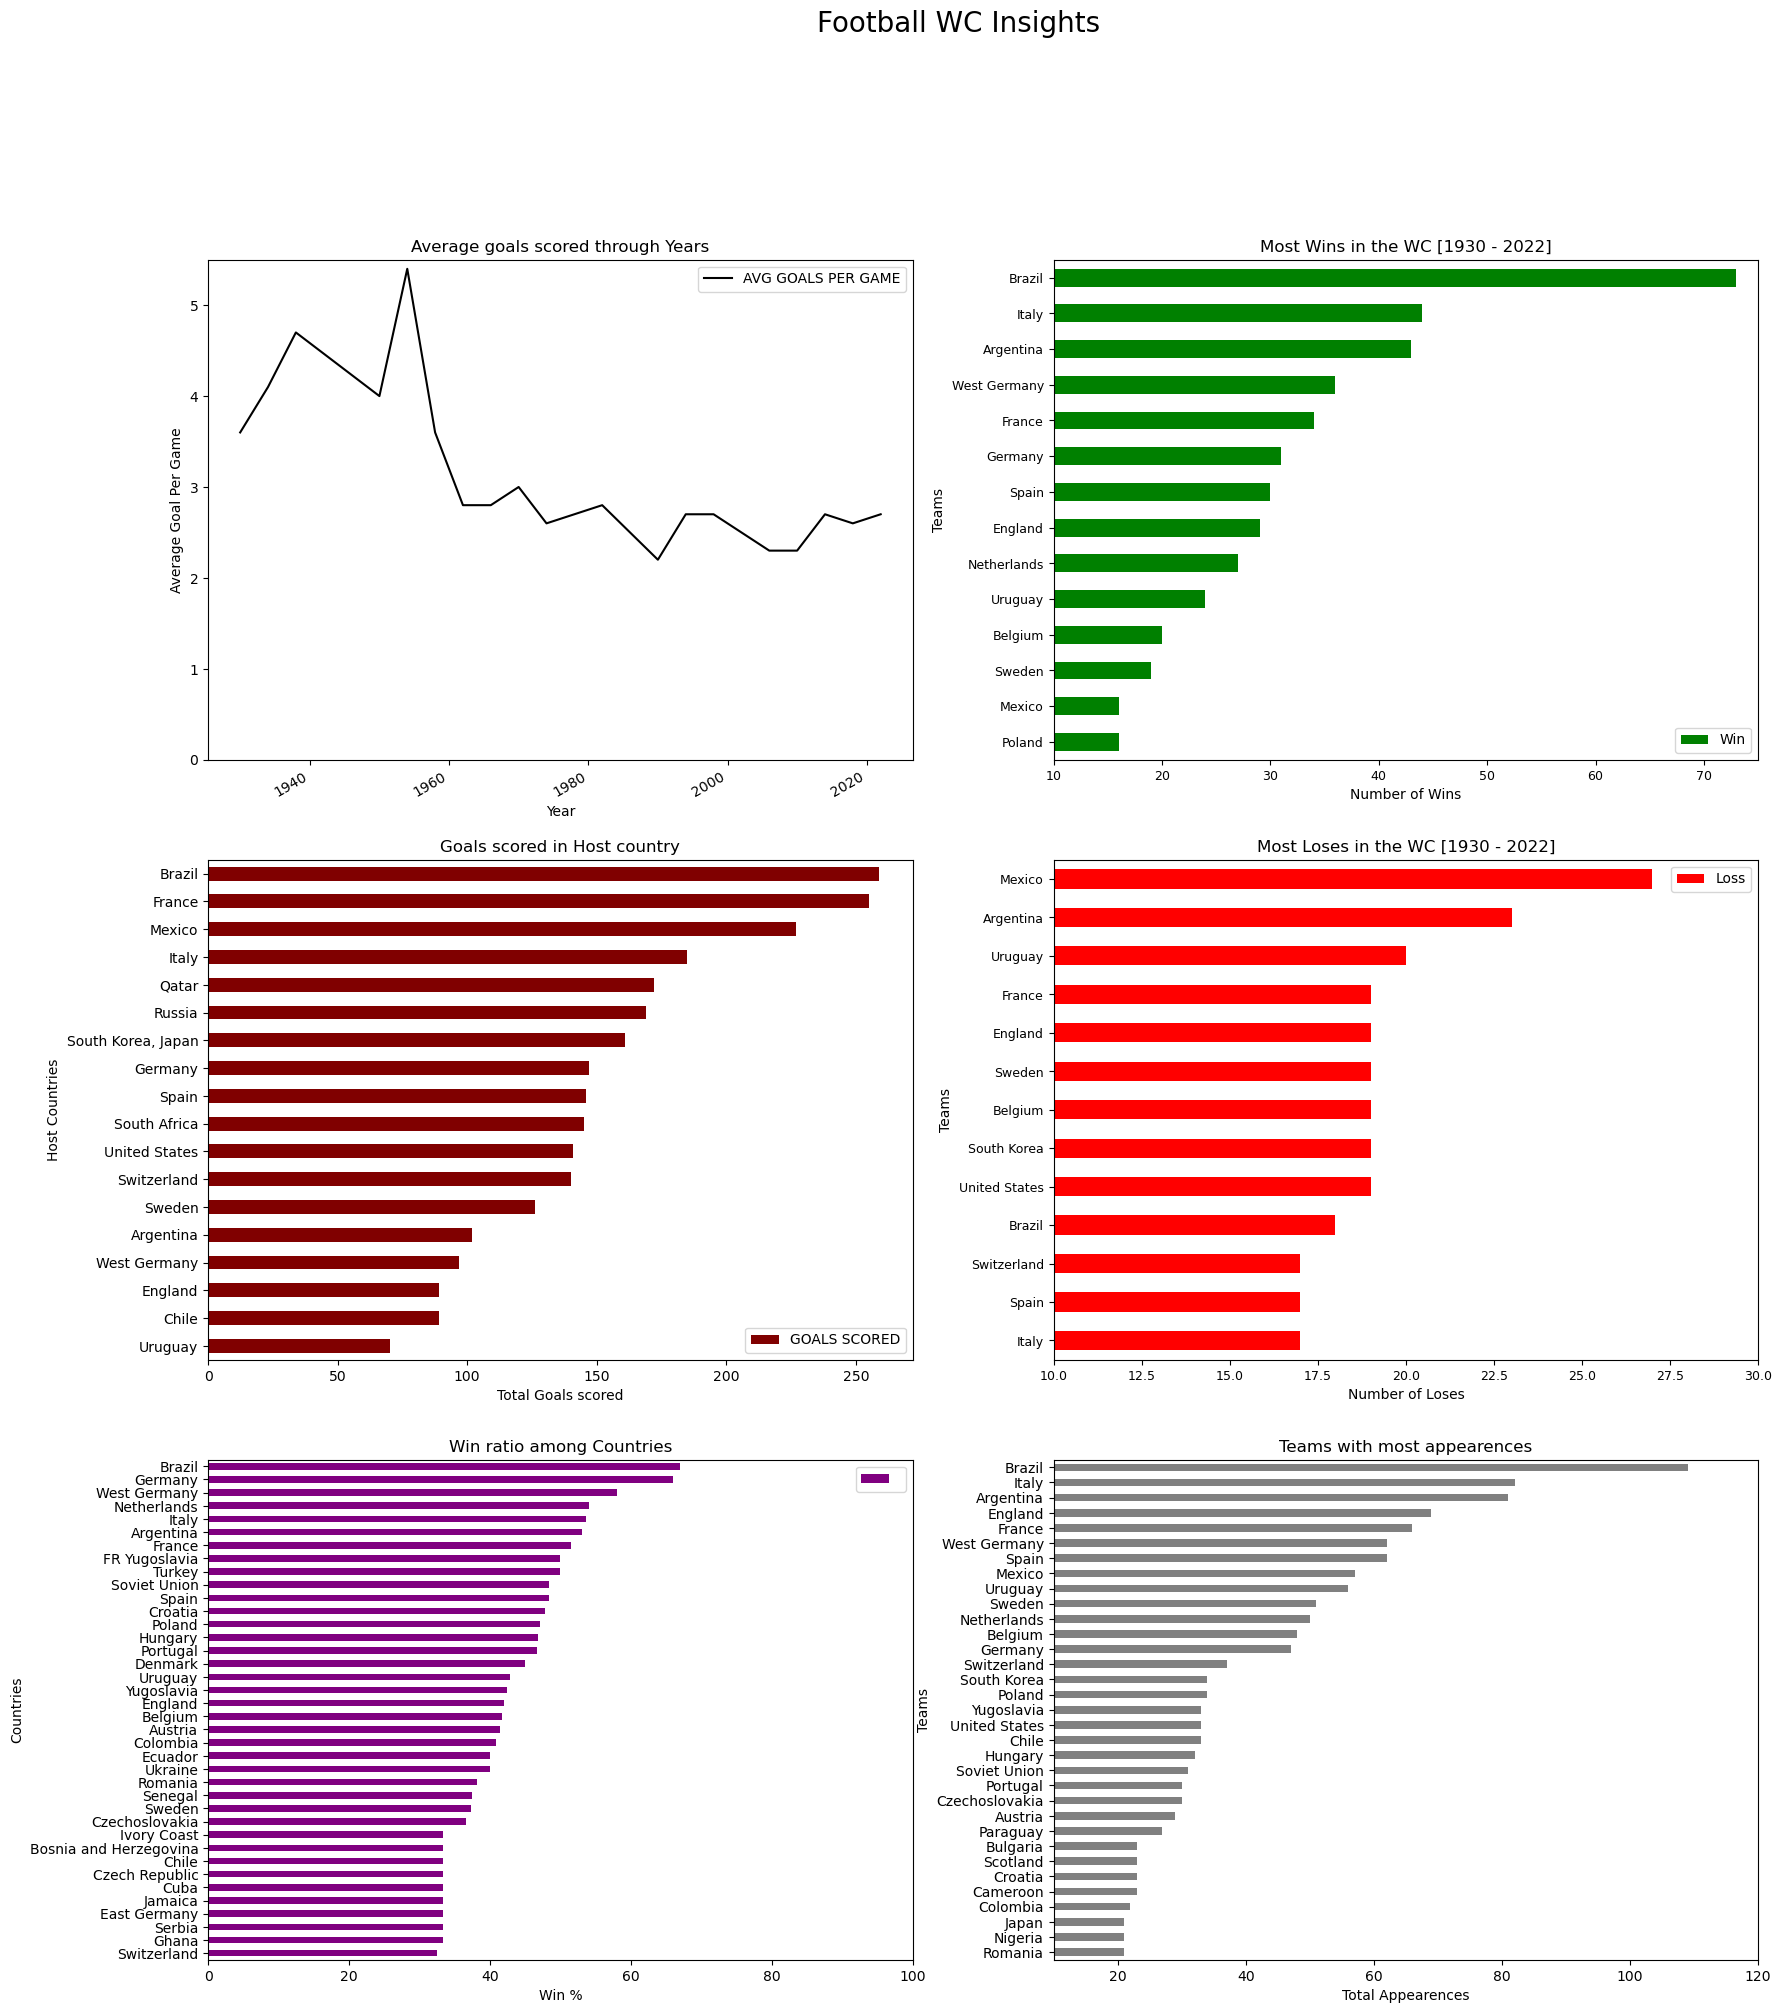

In [26]:
fig, ax = plt.subplots(3,2, figsize = (20,25))
fig.suptitle("Football WC Insights", fontsize = 20)
most_loses.plot(kind = "barh", title = "Most Loses in the WC [1930 - 2022]",
              xlabel = "Number of Loses",ylabel = "Teams",
              xlim = (10,30),
              fontsize = 9,legend = True,color = 'red',
                ax = ax[1,1])

most_win.plot(kind = "barh", title = "Most Wins in the WC [1930 - 2022]",
              xlabel = "Number of Wins",ylabel = "Teams",
              xlim = (10,75),
              fontsize = 9,legend = True,color = 'green',
                ax = ax[0,1])

total_goals_scored_host.plot(kind = "barh", 
                             xlabel = "Total Goals scored", ylabel = "Host Countries"
                             ,title = "Goals scored in Host country",color = 'maroon',
                            ax = ax[1,0], legend = True)

df_2022.plot("YEAR","AVG GOALS PER GAME", ylim = (0,5.5), 
             ylabel = "Average Goal Per Game", xlabel = "Year"
             , title = 'Average goals scored through Years',
            ax =ax[0,0], legend = True, color = 'black')


win_ratio.plot(kind = 'barh', ax =ax[2,0], xlim = (0,100), xlabel = "Win %", ylabel = "Countries",
              title = "Win ratio among Countries",color = "purple", 
              legend = True)

most_appearence.plot(kind = "barh", ax =ax[2,1], xlim = (10,120),
                    title = "Teams with most appearences",
                    xlabel = 'Total Appearences', ylabel = "Teams", color = 'grey')
plt.savefig("output/Football_stats_plot.png")